<a href="https://colab.research.google.com/github/willy-wagtail/Notes/blob/master/Linear_classifier_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [44]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
  mean=[0,3],
  cov=[[1,0.5 ], [0.5,1]],
  size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
  mean=[3,0],
  cov=[[1,0.5], [0.5,1]],
  size=num_samples_per_class
)

inputs = np.vstack(
    (negative_samples, positive_samples)
  ).astype(np.float32)

targets = np.vstack(
    (
     np.zeros((num_samples_per_class, 1), dtype="float32"), 
     np.ones((num_samples_per_class, 1), dtype="float32")
     )
    )


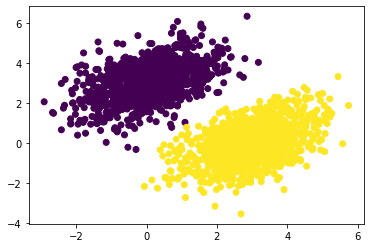

In [45]:
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [46]:
input_dim = 2
output_dim = 1

W=tf.Variable(
    initial_value=tf.random.uniform(
        shape=(input_dim, output_dim)
      )
    )

b=tf.Variable(
    initial_value=tf.zeros(
        shape=(output_dim,)
      )
    )


In [47]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [48]:
def square_loss(targets, predictions) :
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [49]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)

  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss


In [50]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step + 1}: {loss:.4f}")

Loss at step 1: 2.2545
Loss at step 2: 0.2849
Loss at step 3: 0.1312
Loss at step 4: 0.1052
Loss at step 5: 0.0963
Loss at step 6: 0.0901
Loss at step 7: 0.0847
Loss at step 8: 0.0797
Loss at step 9: 0.0752
Loss at step 10: 0.0710
Loss at step 11: 0.0672
Loss at step 12: 0.0637
Loss at step 13: 0.0605
Loss at step 14: 0.0576
Loss at step 15: 0.0549
Loss at step 16: 0.0525
Loss at step 17: 0.0502
Loss at step 18: 0.0481
Loss at step 19: 0.0462
Loss at step 20: 0.0445
Loss at step 21: 0.0429
Loss at step 22: 0.0414
Loss at step 23: 0.0401
Loss at step 24: 0.0389
Loss at step 25: 0.0378
Loss at step 26: 0.0367
Loss at step 27: 0.0358
Loss at step 28: 0.0349
Loss at step 29: 0.0341
Loss at step 30: 0.0334
Loss at step 31: 0.0327
Loss at step 32: 0.0321
Loss at step 33: 0.0316
Loss at step 34: 0.0310
Loss at step 35: 0.0306
Loss at step 36: 0.0301
Loss at step 37: 0.0297
Loss at step 38: 0.0294
Loss at step 39: 0.0290
Loss at step 40: 0.0287


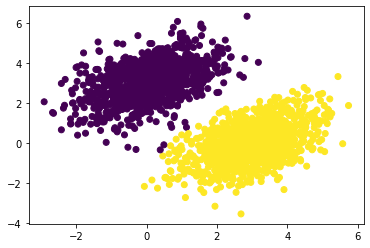

In [53]:
predictions = model(inputs)

plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

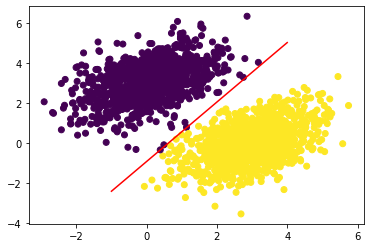

In [55]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]

plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()